# Pandas

* Pandas can roughly be interpreted as "python data analysis", but the name originally came from "panel data"
* Its data is stored in numpy arrays, and many concepts are the same.  But a lot nicer interface for data analysis.  It provides more high-level support for typical data processing.

These examples come directly from [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) from the Pandas documentation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.327303,-2.577888,0.412148,0.405589
2013-01-02,0.589002,1.553772,-1.694987,1.503370
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657
2013-01-05,-0.138968,0.584490,-0.223330,0.459529


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657
2013-01-05,-0.138968,0.584490,-0.223330,0.459529
2013-01-06,0.211795,1.736050,1.527909,-0.078054


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.32730315, -2.57788832,  0.4121484 ,  0.40558936],
       [ 0.58900217,  1.55377175, -1.69498683,  1.50336995],
       [-0.90052789, -0.69445006, -0.76191372, -1.93510571],
       [-0.85606045, -0.95538291,  0.78669988, -1.0956568 ],
       [-0.13896824,  0.58449047, -0.22332995,  0.4595295 ],
       [ 0.2117947 ,  1.73605009,  1.5279089 , -0.07805391]])

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.127909,-0.058901,0.007754,-0.123388
std,0.626713,1.660688,1.151197,1.224388
min,-0.900528,-2.577888,-1.694987,-1.935106
25%,-0.676787,-0.890150,-0.627268,-0.841256
50%,0.036413,-0.054980,0.094409,0.163768
75%,0.298426,1.311451,0.693062,0.446044
max,0.589002,1.736050,1.527909,1.503370


In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.327303,0.589002,-0.900528,-0.856060,-0.138968,0.211795
B,-2.577888,1.553772,-0.694450,-0.955383,0.584490,1.736050
C,0.412148,-1.694987,-0.761914,0.786700,-0.223330,1.527909
D,0.405589,1.503370,-1.935106,-1.095657,0.459529,-0.078054


In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,0.327303,-2.577888,0.412148,0.405589
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106
2013-01-05,-0.138968,0.584490,-0.223330,0.459529
2013-01-02,0.589002,1.553772,-1.694987,1.503370
2013-01-06,0.211795,1.736050,1.527909,-0.078054


# Selection and indexing
Pandas does selection more intuitively than numpy - but that can mean inconsistent sometimes.

In [16]:
# Select columns
df['A']      # same as df.A.  Problem?

2013-01-01    0.327303
2013-01-02    0.589002
2013-01-03   -0.900528
2013-01-04   -0.856060
2013-01-05   -0.138968
2013-01-06    0.211795
Freq: D, Name: A, dtype: float64

In [17]:
# Select rows - note same syntax as above.  What happens if there is ambiguity?
df[0:3]

,A,B,C,D
2013-01-01,0.327303,-2.577888,0.412148,0.405589
2013-01-02,0.589002,1.553772,-1.694987,1.503370
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.589002,1.553772,-1.694987,1.503370
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657


In [19]:
df.loc[dates[0]]

A    0.327303
B   -2.577888
C    0.412148
D    0.405589
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','B']]


,A,B
2013-01-01,0.327303,-2.577888
2013-01-02,0.589002,1.553772
2013-01-03,-0.900528,-0.694450
2013-01-04,-0.856060,-0.955383
2013-01-05,-0.138968,0.584490
2013-01-06,0.211795,1.736050


In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.327303,-2.577888
2013-01-02,0.589002,1.553772
2013-01-03,-0.900528,-0.694450
2013-01-04,-0.856060,-0.955383
2013-01-05,-0.138968,0.584490
2013-01-06,0.211795,1.736050


In [22]:
df.loc['20130102',['A','B']]

A    0.589002
B    1.553772
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0],'A']


0.32730315224981094

In [24]:
df.at[dates[0],'A']

0.32730315224981094

In [25]:
df.iloc[3]

A   -0.856060
B   -0.955383
C    0.786700
D   -1.095657
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.856060,-0.955383
2013-01-05,-0.138968,0.584490


In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.856060,-0.955383
2013-01-05,-0.138968,0.584490


In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.856060,-0.955383
2013-01-05,-0.138968,0.584490


In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,-2.577888,0.412148
2013-01-02,1.553772,-1.694987
2013-01-03,-0.694450,-0.761914
2013-01-04,-0.955383,0.786700
2013-01-05,0.584490,-0.223330
2013-01-06,1.736050,1.527909


In [30]:
df.iloc[1,1]

1.5537717451977613

In [31]:
df.iloc[1,1]

1.5537717451977613

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.327303,-2.577888,0.412148,0.405589
2013-01-02,0.589002,1.553772,-1.694987,1.503370
2013-01-06,0.211795,1.736050,1.527909,-0.078054


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.327303,NaN,0.412148,0.405589
2013-01-02,0.589002,1.553772,NaN,1.503370
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.786700,NaN
2013-01-05,NaN,0.584490,NaN,0.459529
2013-01-06,0.211795,1.736050,1.527909,NaN


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.327303,-2.577888,0.412148,0.405589,one
2013-01-02,0.589002,1.553772,-1.694987,1.503370,one
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106,two
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657,three
2013-01-05,-0.138968,0.584490,-0.223330,0.459529,four
2013-01-06,0.211795,1.736050,1.527909,-0.078054,three


In [35]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.327303,-2.577888,0.412148,0.405589,NaN
2013-01-02,0.589002,1.553772,-1.694987,1.503370,1.0
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106,2.0
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657,3.0
2013-01-05,-0.138968,0.584490,-0.223330,0.459529,4.0
2013-01-06,0.211795,1.736050,1.527909,-0.078054,5.0


In [36]:
df.at[dates[0],'A'] = 0

# Missing data
Missing data handling is one of the nicest features of pandas:

In [37]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,-2.577888,0.412148,0.405589,NaN,NaN
2013-01-02,0.589002,1.553772,-1.694987,1.503370,1.0,NaN
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106,2.0,NaN
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657,3.0,NaN


In [38]:
df1.loc[dates[0]:dates[1],'E'] = 1


In [39]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.589002,1.553772,-1.694987,1.50337,1.0,1.0


In [40]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-2.577888,0.412148,0.405589,5.0,1.0
2013-01-02,0.589002,1.553772,-1.694987,1.503370,1.0,1.0
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106,2.0,5.0
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657,3.0,5.0


In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-2.577888,0.412148,0.405589,5.0,1.0
2013-01-02,0.589002,1.553772,-1.694987,1.503370,1.0,1.0
2013-01-03,-0.900528,-0.694450,-0.761914,-1.935106,2.0,5.0
2013-01-04,-0.856060,-0.955383,0.786700,-1.095657,3.0,5.0


# Operations

Operations generally do the right things in the face of missing data!

In [42]:
df.mean()

A   -0.182460
B   -0.058901
C    0.007754
D   -0.123388
F    3.000000
dtype: float64

In [43]:
df.mean(axis=1)

2013-01-01   -0.440038
2013-01-02    0.590231
2013-01-03   -0.458399
2013-01-04    0.175920
2013-01-05    0.936344
2013-01-06    1.679540
Freq: D, dtype: float64

# Time series

In [7]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()
ts

2012-01-01    23220
Freq: 5T, dtype: int64

In [45]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts_utc = ts.tz_localize('UTC')

In [46]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.688729
2012-03-06 19:00:00-05:00   -0.123295
2012-03-07 19:00:00-05:00    0.430242
2012-03-08 19:00:00-05:00    0.688402
2012-03-09 19:00:00-05:00    0.334952
Freq: D, dtype: float64

In [47]:
rng = pd.date_range('1/1/2012', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-01    0.760837
2012-01-02    1.556494
2012-01-03   -1.659457
2012-01-04    0.947766
2012-01-05    0.064814
Freq: D, dtype: float64

# Data alignment
Data alignment based on indexing, combined with missing data handling, is another of the most useful things in pandas

In [48]:
dates = pd.date_range('1/1/2012', periods=10, freq='D')
ts = pd.Series(np.random.randint(0, 10, len(dates)), index=dates)
ts

2012-01-01    7
2012-01-02    7
2012-01-03    8
2012-01-04    9
2012-01-05    2
2012-01-06    7
2012-01-07    6
2012-01-08    8
2012-01-09    4
2012-01-10    5
Freq: D, dtype: int64

In [49]:
ts[:5] + ts

2012-01-01    14.0
2012-01-02    14.0
2012-01-03    16.0
2012-01-04    18.0
2012-01-05     4.0
2012-01-06     NaN
2012-01-07     NaN
2012-01-08     NaN
2012-01-09     NaN
2012-01-10     NaN
Freq: D, dtype: float64

In [50]:
dates1 = pd.date_range('1/1/2012', periods=10, freq='D')
ts1    = pd.Series(np.random.randint(0, 10, len(dates1)), index=dates1)
dates2 = pd.date_range('1/5/2012', periods=10, freq='D')
ts2    = pd.Series(np.random.randint(0, 10, len(dates2)), index=dates2)
ts1 + ts2

2012-01-01     NaN
2012-01-02     NaN
2012-01-03     NaN
2012-01-04     NaN
2012-01-05     8.0
2012-01-06    15.0
2012-01-07     9.0
2012-01-08     3.0
2012-01-09    11.0
2012-01-10    12.0
2012-01-11     NaN
2012-01-12     NaN
2012-01-13     NaN
2012-01-14     NaN
Freq: D, dtype: float64

# Plotting
We'll do this later (day 3), but for now...

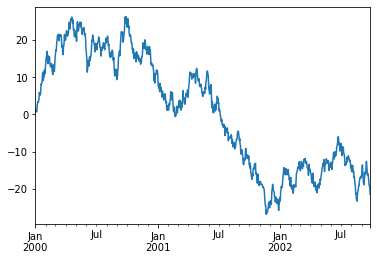

In [51]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

# Reading data in pandas
There is lots of support for automatically reading in data in various formats.  Let's use the same dataset as last time, and see what new we can do.

In [52]:
iris = pd.read_csv('../data/iris.data',
                   names=('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'type'))
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exercises 04
These exercises are taken with pride from https://github.com/ajcr/100-pandas-puzzles

## DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [4]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, labels)

**5.** Display a summary of the basic information about this DataFrame and its data.

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [8]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [9]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [24]:
df.loc[df.index[[3,4,8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [27]:
df[df['visits'] > 3]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [30]:
df[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [39]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [45]:
df[df['age'].between(2,4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [48]:
df.loc['f', 'age'] = 1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [51]:
df['visits'].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [55]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [62]:
df.loc['k'] = ['elephant', 42, 0, 'no']
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [71]:
df['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [75]:
df.sort_values(by=['age', 'visits'], ascending=(False, True))

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [79]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})

In [82]:
df['priority'].map({True: 'yes yes'})

a    yes yes
b    yes yes
c        NaN
d    yes yes
e        NaN
f        NaN
g        NaN
h    yes yes
i        NaN
j        NaN
Name: priority, dtype: object

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [89]:
df['animal'] = df['animal'].replace('snake', 'python')

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [94]:
df.pivot_table(values='age', index='animal', columns='visits')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.